# Лабораторная 1

In [1]:
import numpy as np

In [2]:
def bruteforce(f, a, b, eps):
    x = np.linspace(a,b,int((b-a)/eps))
    return f(x[np.argmin(f(x))]), x[np.argmin(f(x))], (b-a)/eps

In [3]:
def iterative_search(f, a, b, eps, delta = 0.1):
    eps = eps/4
    x0 = a
    x1 = min(b, a+delta)
    i = 0
    while eps<abs(delta):
        while f(x1)<f(x0) and x1<b and x1>a:
            x0 = x1
            x1 = min(b, x1+delta)
            i = i + 1
        delta = -delta/4
    return f(x1), x1, i

In [4]:
def split_search(f, a, b, eps, k=0, s = 1.4):
    if (b-a)/2<eps:
        return f((a+b)/2), (a+b)/2, k
    delta = s*eps
    x1 = (b+a-delta)/2
    x2 = (b+a+delta)/2
    if f(x1)<=f(x2):
        return split_search(f,a,x2,eps, k+1, s)
    else:
        return split_search(f,x1,b,eps, k+1, s)

In [5]:
def golden_split_search(f, a, b, eps):
    tau = (np.sqrt(5)-1)/2
    x2 = a + tau*(b-a)
    x1 = a+b-x2
    f1 = f(x1)
    f2 = f(x2)
    t = 0
    while eps < (b-a)/2: 
        if f(x1)<=f(x2):
            b = x2
            x2 = x1
            x1 = a+b-x1
        else:
            a = x1
            x1 = x2
            x2 = a+b-x2
        t = t+1
    return f((a+b)/2), (a+b)/2, t

In [6]:
def interpolation_search(f, a, b, eps):
    while True:
        x1 = a + np.random.rand()*(b-a)
        x2 = a + np.random.rand()*(b-a)
        x3 = a + np.random.rand()*(b-a)
        if x1<x2<x3 and f(x2)<f(x3) and f(x2)<f(x1):
            break
    delta = 2*eps
    x_min = 1e20
    x_min_1 = 0
    t = 0
    while eps<delta:
        f1 = f(x1)
        f2 = f(x2)
        f3 = f(x3)
        a1 = (f2-f1)/(x2-x1)
        a2 = ((f3-f1)/(x3-x1) - (f2-f1)/(x2-x1))/(x3-x2)
        x_min_1 = x_min
        x_min = (x1+x2-a1/a2)/2
        if x_min<x2:
            if f2<f(x_min):
                x1 = x_min
            else:
                x3 = x2
                x2 = x_min
        else:
            if f2<f(x_min):
                x3 = x_min
            else:
                x1 = x2
                x2 = x_min
        delta = abs(x_min - x_min_1)
        t = t + 1
    return f(x_min), x_min, t

In [7]:
import matplotlib.pyplot as plt
%matplotlib notebook

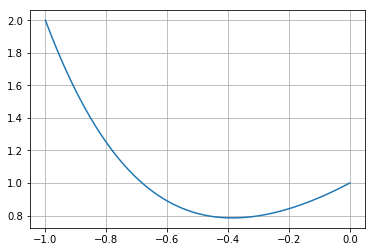

In [8]:
q = np.linspace(-1, 0, 1000)
plt.figure()
plt.plot(q, q**4+q**2+q+1)
plt.grid()

## Задание 2
минимизация функции $ x^4 + x^2 + x + 1$ 

In [9]:
bruteforce(lambda x: x**4+x**2+x+1, -1.0, 0.0, 1e-4)

(0.7851952539002883, -0.3854385438543855, 10000.0)

In [10]:
iterative_search(lambda x: x**4+x**2+x+1, -1.0, 0.0, 1e-4, 0.01)

(0.78525136, -0.37999999999999945, 61)

In [11]:
split_search(lambda x: x**4+x**2+x+1, -1.0, 0.0, 1e-4)

(0.7851952533291174, -0.38546830718994146, 15)

In [12]:
golden_split_search(lambda x: x**4+x**2+x+1, -1.0, 0.0, 1e-4)

(0.7851952539264693, -0.3854381999831844, 18)

In [13]:
interpolation_search(lambda x: x**4+x**2+x+1, -1.0, 0.0, 1e-4)

(0.7851952531528434, -0.3854567617642054, 5)

In [14]:
from scipy.optimize import minimize
minimize(lambda x: x**4+x**2+x+1, [0.5], bounds =[(-1,0)])

      fun: array([0.78519525])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.5519144e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 14
      nit: 5
   status: 0
  success: True
        x: array([-0.38545862])

## Задание 5
количество шагов для достижения точности $1/10^4$

перебор: $10^4$

поразрядный поиск: ~60


метод дихотомиии: 15

метод золотого сечения: 19

метод парабол: ~10

## Задание 6
минимизация функции $ e^x-1-x-x^2-\frac{x^3}{6}$

In [26]:
def f(x):
    return np.exp(x)-1-x-x**2/2-x**3/6

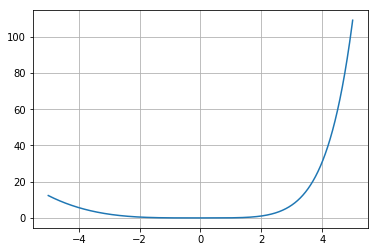

In [31]:
q = np.linspace(-5, 5, 10000)
plt.figure()
plt.plot(q, f(q))
plt.grid()

In [32]:
golden_split_search(lambda x: np.exp(x)-1-x-x**2/2-x**3/6, -5.0, 5.0, 1e-4)

(2.1074933718930816e-16, 0.0002227017885036986, 23)

In [33]:
interpolation_search(lambda x: np.exp(x)-1-x-x**2/2-x**3/6, -5.0, 5.0, 1e-4)

(5.163655426720863e-07, -0.059508530521636134, 200)